# 1.Data Exploration:

In [1]:
%pip install datasets
from datasets import load_dataset

# Load the dataset
dataset = load_dataset('yelp_review_full')

Note: you may need to restart the kernel to use updated packages.


/Users/nanchen/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
Found cached dataset parquet (/Users/nanchen/.cache/huggingface/datasets/parquet/yelp_review_full-9c7006f5a2e02666/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
print(dataset)
print(dataset['train'][:5])
df = dataset['train'].to_pandas()
print(df.head())

DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 650000
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 50000
    })
})
{'label': [4, 1, 3, 3, 0], 'text': ["dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank.", "Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It u

The dataset has 650,000 training samples and 50,000 testing samples. Each sample has a 'label' and some 'text'. The 'label' is a number from 0 to 4 that means 1 start to 5 stars and shows how good or bad the review is. The 'text' is the review itself. The next step in the code will create a picture that shows how many samples there are for each label number, both for training and testing. This is to make sure we have a fair mix, which helps build fair and reliable machine learning models.

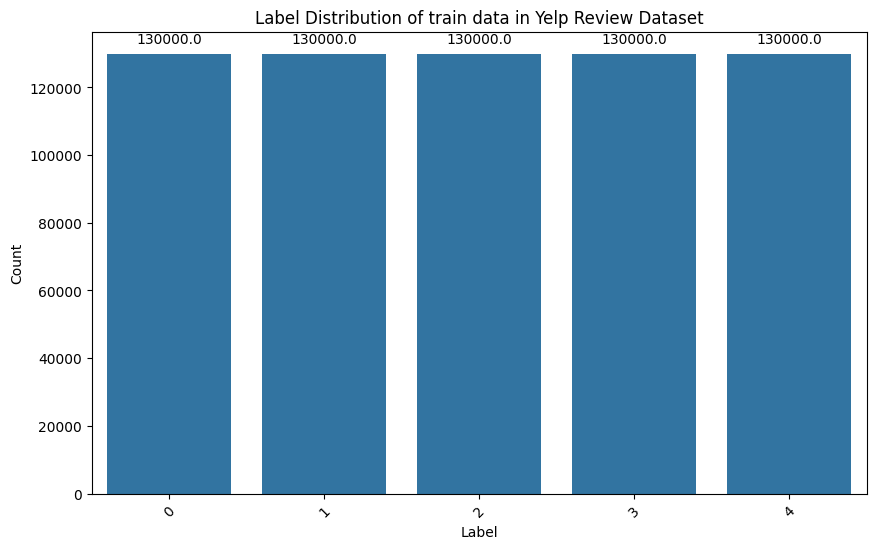

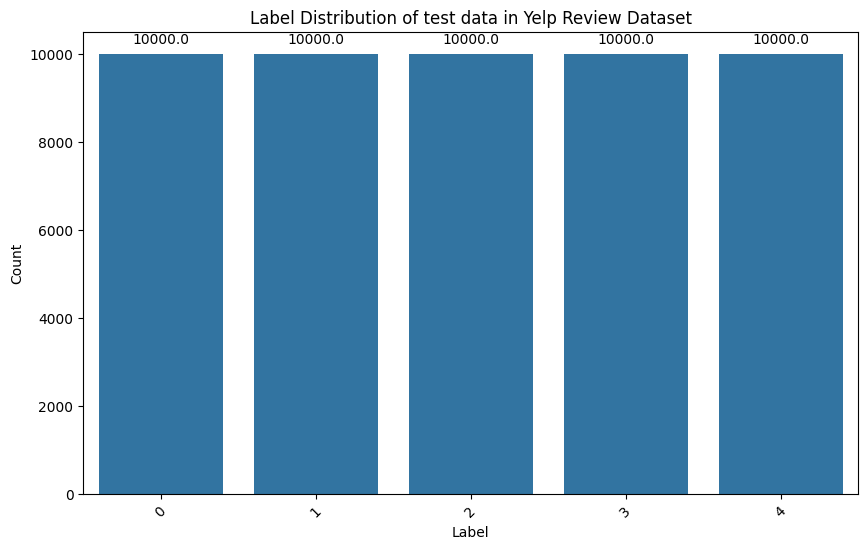

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the distribution of labels
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='label')
plt.title('Label Distribution of train data in Yelp Review Dataset')
plt.xlabel('Label')
plt.ylabel('Count')

# Annotate each bar with the count of observations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

plt.xticks(rotation=45)
plt.show()

df_test = dataset['test'].to_pandas()
# Plot the distribution of labels
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_test, x='label')
plt.title('Label Distribution of test data in Yelp Review Dataset')
plt.xlabel('Label')
plt.ylabel('Count')

# Annotate each bar with the count of observations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), 
                textcoords = 'offset points')

plt.xticks(rotation=45)
plt.show()

The two images depict the label distributions in the training and test datasets, respectively. Each chart shows an equal count for all labels, which is crucial for developing unbiased machine learning models with broad applicability. This uniformity ensures that the models trained on this data can learn and evaluate effectively without preference for any particular label.

# 2. Sentiment Analysis:

I have created a new DataFrame based on a random sample of 1000 rows from an existing DataFrame. This new DataFrame contains three columns: ‘sentiment’, 'label' and ‘text’. The ‘sentiment’ column is determined by mapping the original labels to sentiment categories. Specifically, labels ‘0’ and ‘1’ are mapped to ‘Negative’, and labels ‘3’ and ‘4’ are mapped to ‘Positive’. Therefore, each row in the DataFrame represents a text sample, its original label and its corresponding sentiment label. In the randow sample, it flitered out rows woth label ‘2’ as one of the model I choosen does not have ‘Neutral’ sentiment predition.

In [3]:
# Filter out rows with label 2
df = df[df['label'] != 2]

In [4]:
# Randomly select 1000 rows from the DataFrame
random_sample = df.sample(n=1000, random_state=1)
# Print the first five rows
print(random_sample.head())
# Print the last five rows
print(random_sample.tail())

        label                                               text
87408       1  Although I've dined at Lombardino's before and...
431412      0  This review is basically for AT & T in general...
467836      0  Gestern hatte ich wieder so einen B\u00f6ckele...
637767      4  Have been to this restaurant several times now...
209964      4  Solid 5 stars.  I love P.F. Chang's.  I had a ...
        label                                               text
647041      4  Great place. Perfect for lunch or dinner or ju...
31583       1  I came into the restaurant a few days ago and ...
478076      0  Done, gone, repossessed!  How you have a semi-...
204086      1  This place is okay, not worth the 2.50 per cup...
600552      0  My fianc\u00e9 and I really don't like Olive G...


In [5]:
# Define a function to map the label numbers to sentiment labels
def map_label(label):
    if label in [0, 1]:
        return "Negative"
    elif label == 2:
        return "Neutral"
    else:  # 3 and 4
        return "Positive"

# Apply the function to the 'label' column to create a new 'sentiment' column
random_sample['sentiment'] = random_sample['label'].apply(map_label)

# Create a new DataFrame with only 'sentiment' and 'text' columns
new_df = random_sample[['sentiment', 'label', 'text' ]].copy()

# Reset the index of the new DataFrame, but keep the old index
new_df.reset_index(inplace=True)

# Print the first five rows
print(new_df.head())

# Print the last five rows
print(new_df.tail())


    index sentiment  label                                               text
0   87408  Negative      1  Although I've dined at Lombardino's before and...
1  431412  Negative      0  This review is basically for AT & T in general...
2  467836  Negative      0  Gestern hatte ich wieder so einen B\u00f6ckele...
3  637767  Positive      4  Have been to this restaurant several times now...
4  209964  Positive      4  Solid 5 stars.  I love P.F. Chang's.  I had a ...
      index sentiment  label  \
995  647041  Positive      4   
996   31583  Negative      1   
997  478076  Negative      0   
998  204086  Negative      1   
999  600552  Negative      0   

                                                  text  
995  Great place. Perfect for lunch or dinner or ju...  
996  I came into the restaurant a few days ago and ...  
997  Done, gone, repossessed!  How you have a semi-...  
998  This place is okay, not worth the 2.50 per cup...  
999  My fianc\u00e9 and I really don't like Olive G...

In this task, i choose three models: "cardiffnlp/twitter-roberta-base-sentiment-latest", "LiYuan/amazon-review-sentiment-analysis" and "distilbert-base-uncased-finetuned-sst-2-english".

### "cardiffnlp/twitter-roberta-base-sentiment-latest"

In [6]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax
import pandas as pd

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)

# Initialize an empty list to store the outputs
results = []

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
#model.save_pretrained(MODEL)
# Iterate over the Yelp reviews in batches
for review in random_sample['text']:

    # Tokenize the batch of reviews
    encoded_input = tokenizer(review, truncation=True, max_length=500, padding=True, return_tensors="pt")


    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)

    ranking = np.argsort(scores)
    ranking = ranking[::-1]
    result = {}
    for i in range(scores.shape[0]):
        l = config.id2label[ranking[i]]
        s = scores[ranking[i]]
        result[l] = np.round(float(s), 4)
    result["text"] = review
    results.append(result)

# Convert the output to a dataframe including the text
cardiffnlp_df = pd.DataFrame(results)
print(cardiffnlp_df)



/Users/nanchen/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


     negative  neutral  positive  \
0      0.6432   0.3035    0.0533   
1      0.4116   0.5362    0.0522   
2      0.0704   0.7087    0.2209   
3      0.0034   0.0100    0.9865   
4      0.0884   0.1731    0.7385   
..        ...      ...       ...   
995    0.0027   0.0128    0.9845   
996    0.8955   0.0915    0.0130   
997    0.8828   0.1080    0.0092   
998    0.8441   0.1386    0.0173   
999    0.7318   0.2247    0.0435   

                                                  text  
0    Although I've dined at Lombardino's before and...  
1    This review is basically for AT & T in general...  
2    Gestern hatte ich wieder so einen B\u00f6ckele...  
3    Have been to this restaurant several times now...  
4    Solid 5 stars.  I love P.F. Chang's.  I had a ...  
..                                                 ...  
995  Great place. Perfect for lunch or dinner or ju...  
996  I came into the restaurant a few days ago and ...  
997  Done, gone, repossessed!  How you have a semi-...

I have created a new DataFrame with three columns: ‘label’, ‘score’, and ‘text’. For each row, the ‘label’ column is determined by the sentiment (positive, neutral, or negative) that has the highest score. The ‘score’ column contains the highest score itself, and the ‘text’ column contains the corresponding review text. In other words, for each review, the DataFrame stores the most likely sentiment, the confidence score of that sentiment, and the review text itself.

In [7]:
# Initialize an empty list to store the outputs
new_results = []

# Iterate over the results
for result in results:
    # Create a new dictionary that only contains the sentiment scores
    scores = {k: v for k, v in result.items() if k != 'text'}
    # Get the label with the maximum score
    max_label = max(scores, key=scores.get)
    # Get the maximum score
    max_score = scores[max_label]
    # Get the text
    text = result['text']
    # Append the new result to the new_results list
    new_results.append({'label': max_label, 'score': max_score, 'text': text})

# Convert the output to a dataframe including the text
new_cardiffnlp_df = pd.DataFrame(new_results)
print(new_cardiffnlp_df)



        label   score                                               text
0    negative  0.6432  Although I've dined at Lombardino's before and...
1     neutral  0.5362  This review is basically for AT & T in general...
2     neutral  0.7087  Gestern hatte ich wieder so einen B\u00f6ckele...
3    positive  0.9865  Have been to this restaurant several times now...
4    positive  0.7385  Solid 5 stars.  I love P.F. Chang's.  I had a ...
..        ...     ...                                                ...
995  positive  0.9845  Great place. Perfect for lunch or dinner or ju...
996  negative  0.8955  I came into the restaurant a few days ago and ...
997  negative  0.8828  Done, gone, repossessed!  How you have a semi-...
998  negative  0.8441  This place is okay, not worth the 2.50 per cup...
999  negative  0.7318  My fianc\u00e9 and I really don't like Olive G...

[1000 rows x 3 columns]


### "LiYuan/amazon-review-sentiment-analysis"

In [8]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch.nn.functional as F
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd

tokenizer = AutoTokenizer.from_pretrained("LiYuan/amazon-review-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("LiYuan/amazon-review-sentiment-analysis")

# Initialize an empty list to store the outputs
results = []

for review in random_sample['text']:
    # Tokenize the batch of reviews
    encoded_input = tokenizer(review, truncation=True, max_length=500, padding=True, return_tensors="pt")
    result = {}

    with torch.no_grad():
        logits = model(**encoded_input).logits

    predicted_class_id = logits.argmax().item()
    predicted_class_label = model.config.id2label[predicted_class_id]

    # Apply softmax to the logits
    probabilities = F.softmax(logits, dim=1)

    # Get the probability of the predicted class
    predicted_class_probability = probabilities[0, predicted_class_id].item()

    # Store the review, predicted class label, and probability in the result dictionary
    result["label"] = predicted_class_label
    result["score"] = predicted_class_probability
    result["text"] = review

    # Append the result dictionary to the results list
    results.append(result)

# Convert the output to a dataframe including the text
LiYuan_df = pd.DataFrame(results)
print(LiYuan_df)


/Users/nanchen/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


       label     score                                               text
0    2 stars  0.895350  Although I've dined at Lombardino's before and...
1     1 star  0.924806  This review is basically for AT & T in general...
2    5 stars  0.648529  Gestern hatte ich wieder so einen B\u00f6ckele...
3    5 stars  0.858533  Have been to this restaurant several times now...
4    5 stars  0.850267  Solid 5 stars.  I love P.F. Chang's.  I had a ...
..       ...       ...                                                ...
995  5 stars  0.770085  Great place. Perfect for lunch or dinner or ju...
996   1 star  0.552957  I came into the restaurant a few days ago and ...
997  5 stars  0.728095  Done, gone, repossessed!  How you have a semi-...
998  3 stars  0.825199  This place is okay, not worth the 2.50 per cup...
999   1 star  0.369396  My fianc\u00e9 and I really don't like Olive G...

[1000 rows x 3 columns]


I have created a new DataFrame with three columns: ‘label’, ‘score’, and ‘text’. The ‘label’ column is determined by the sentiment corresponding to the star rating of each review. For instance, reviews with a rating of ‘5 stars’ or ‘4 stars’ are labeled as ‘Positive’, reviews with a ‘3 stars’ rating are labeled as ‘Neutral’, and those with ‘2 stars’ or ‘1 star’ are labeled as ‘Negative’. The ‘score’ column contains the corresponding sentiment score, and the ‘text’ column contains the review text. Therefore, each row in the DataFrame represents a review, its sentiment label, and the sentiment score.

In [9]:
# Define a function to map star ratings to sentiment labels
def map_label(label):
    if label in ["5 stars", "4 stars"]:
        return "Positive"
    elif label == "3 stars":
        return "Neutral"
    else:  # "2 stars" and "1 star"
        return "Negative"

# Initialize an empty list to store the outputs
new_results = []

for result in results:
    # Map the star rating to a sentiment label
    new_label = map_label(result["label"])
    # Store the review, new sentiment label, and probability in the result dictionary
    new_result = {"label": new_label, "score": result["score"], "text": result["text"]}
    # Append the new result dictionary to the new_results list
    new_results.append(new_result)

# Convert the output to a dataframe including the text
new_LiYuan_df = pd.DataFrame(new_results)
print(new_LiYuan_df)


        label     score                                               text
0    Negative  0.895350  Although I've dined at Lombardino's before and...
1    Negative  0.924806  This review is basically for AT & T in general...
2    Positive  0.648529  Gestern hatte ich wieder so einen B\u00f6ckele...
3    Positive  0.858533  Have been to this restaurant several times now...
4    Positive  0.850267  Solid 5 stars.  I love P.F. Chang's.  I had a ...
..        ...       ...                                                ...
995  Positive  0.770085  Great place. Perfect for lunch or dinner or ju...
996  Negative  0.552957  I came into the restaurant a few days ago and ...
997  Positive  0.728095  Done, gone, repossessed!  How you have a semi-...
998   Neutral  0.825199  This place is okay, not worth the 2.50 per cup...
999  Negative  0.369396  My fianc\u00e9 and I really don't like Olive G...

[1000 rows x 3 columns]


### "distilbert-base-uncased-finetuned-sst-2-english"

In [10]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch.nn.functional as F

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

# Initialize an empty list to store the outputs
results = []

for review in random_sample['text']:
    # Tokenize the batch of reviews
    encoded_input = tokenizer(review, truncation=True, max_length=500, padding=True, return_tensors="pt")
    result = {}

    with torch.no_grad():
        logits = model(**encoded_input).logits

    predicted_class_id = logits.argmax().item()
    predicted_class_label = model.config.id2label[predicted_class_id]

    # Apply softmax to the logits
    probabilities = F.softmax(logits, dim=1)

    # Get the probability of the predicted class
    predicted_class_probability = probabilities[0, predicted_class_id].item()

    # Store the review, predicted class label, and probability in the result dictionary
    result["label"] = predicted_class_label
    result["score"] = predicted_class_probability
    result["text"] = review

    # Append the result dictionary to the results list
    results.append(result)

# Convert the output to a dataframe including the text
distilbert_df = pd.DataFrame(results)
print(distilbert_df)
print(distilbert_df['label'].value_counts())



        label     score                                               text
0    NEGATIVE  0.999523  Although I've dined at Lombardino's before and...
1    NEGATIVE  0.999587  This review is basically for AT & T in general...
2    NEGATIVE  0.995537  Gestern hatte ich wieder so einen B\u00f6ckele...
3    POSITIVE  0.999798  Have been to this restaurant several times now...
4    POSITIVE  0.983273  Solid 5 stars.  I love P.F. Chang's.  I had a ...
..        ...       ...                                                ...
995  POSITIVE  0.999824  Great place. Perfect for lunch or dinner or ju...
996  NEGATIVE  0.997701  I came into the restaurant a few days ago and ...
997  NEGATIVE  0.999292  Done, gone, repossessed!  How you have a semi-...
998  NEGATIVE  0.998770  This place is okay, not worth the 2.50 per cup...
999  NEGATIVE  0.978287  My fianc\u00e9 and I really don't like Olive G...

[1000 rows x 3 columns]
label
NEGATIVE    522
POSITIVE    478
Name: count, dtype: int64


### Analyze the overall sentiment distribution and provide insights based on the results.

 I computed the percentage of incorrect predictions made by three sentiment analysis models (new_cardiffnlp_df, new_LiYuan_df, distilbert_df) for each sentiment label (0, 1, 3, 4) in the new_df dataset. I then visualized these percentages using a histogram. The x-axis of the histogram represents the sentiment labels, while the y-axis represents the percentage of incorrect predictions. Each sentiment label on the x-axis has three corresponding bars on the histogram, each representing the percentage of incorrect predictions made by one of the three models.

Incorrect count for each model:

   Label  cardiffnlp_model  LiYuan_model  distilbert_model
0      0                50            38                 5
1      1               100           113                29
2      3                31            10                41
3      4                15             3                19
4  Total               196           164                94

Incorrect precentage for each model:

   Label  cardiffnlp_model  LiYuan_model  distilbert_model
0      0         25.510204     23.170732          5.319149
1      1         51.020408     68.902439         30.851064
2      3         15.816327      6.097561         43.617021
3      4          7.653061      1.829268         20.212766


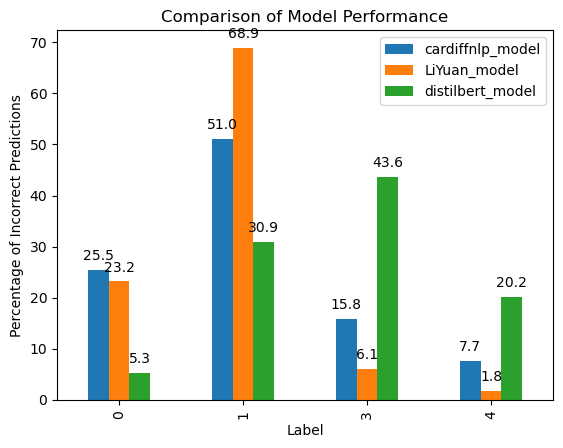

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# These are the true sentiments of the reviews
true_sentiments = new_df['sentiment'].str.lower()

# These are the labels predicted by the three models
predicted_labels_model1 = new_cardiffnlp_df['label'].str.lower()
predicted_labels_model2 = new_LiYuan_df['label'].str.lower()
predicted_labels_model3 = distilbert_df['label'].str.lower()

# Initialize counters for each model
incorrect_counts_model1 = {0: 0, 1: 0, 3: 0, 4: 0}
incorrect_counts_model2 = {0: 0, 1: 0, 3: 0, 4: 0}
incorrect_counts_model3 = {0: 0, 1: 0, 3: 0, 4: 0}

# Iterate over the reviews
for i, true_sentiment in enumerate(true_sentiments):
    if true_sentiment != 'neutral':
        # Get the predictions of the three models
        pred1, pred2, pred3 = predicted_labels_model1[i], predicted_labels_model2[i], predicted_labels_model3[i]
        # If any of the predictions is incorrect
        if true_sentiment != pred1:
            incorrect_counts_model1[new_df['label'][i]] += 1
        if true_sentiment != pred2:
            incorrect_counts_model2[new_df['label'][i]] += 1
        if true_sentiment != pred3:
            incorrect_counts_model3[new_df['label'][i]] += 1

# Calculate total number of incorrent labels for each model
total_incorrect_counts_model1 = sum(incorrect_counts_model1.values())
total_incorrect_counts_model2 = sum(incorrect_counts_model2.values())
total_incorrect_counts_model3 = sum(incorrect_counts_model3.values())

# Calculate the percentage of incorrect predictions for each model
percentage_incorrect_model1 = {k: (v / total_incorrect_counts_model1) * 100 for k, v in incorrect_counts_model1.items()}
percentage_incorrect_model2 = {k: (v / total_incorrect_counts_model2) * 100 for k, v in incorrect_counts_model2.items()}
percentage_incorrect_model3 = {k: (v / total_incorrect_counts_model3) * 100 for k, v in incorrect_counts_model3.items()}

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Label': [0, 1, 3, 4],
    'cardiffnlp_model': [incorrect_counts_model1[i] for i in [0, 1, 3, 4]],
    'LiYuan_model': [incorrect_counts_model2[i] for i in [0, 1, 3, 4]],
    'distilbert_model': [incorrect_counts_model3[i] for i in [0, 1, 3, 4]]
})

# Create a new DataFrame with the total percentages
total_df = pd.DataFrame({
    'Label': ['Total'],
    'cardiffnlp_model': [total_incorrect_counts_model1],
    'LiYuan_model': [total_incorrect_counts_model2],
    'distilbert_model': [total_incorrect_counts_model3]
})

# Append the new DataFrame to the original DataFrame
results_df1 = pd.concat([results_df, total_df], ignore_index=True)
print("Incorrect count for each model:")
print()
print(results_df1)
print()

percentage_incorrect_results_df = pd.DataFrame({
    'Label': [0, 1, 3, 4],
    'cardiffnlp_model': [percentage_incorrect_model1[i] for i in [0, 1, 3, 4]],
    'LiYuan_model': [percentage_incorrect_model2[i] for i in [0, 1, 3, 4]],
    'distilbert_model': [percentage_incorrect_model3[i] for i in [0, 1, 3, 4]]
})
print("Incorrect precentage for each model:")
print()
print(percentage_incorrect_results_df)


# Plot a histogram of the results
ax = percentage_incorrect_results_df.plot(x='Label', y=['cardiffnlp_model', 'LiYuan_model', 'distilbert_model'], kind='bar')
plt.ylabel('Percentage of Incorrect Predictions')
plt.title('Comparison of Model Performance')

# Add data labels above each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

plt.show()



1. Sentiment Distribution: 

    The sentiment labels are distributed across four categories: 0, 1, 3, and 4. In our dataset, labels ‘0’ and ‘1’ are mapped to ‘Negative’, and labels ‘3’ and ‘4’ are mapped to ‘Positive’. This suggests that the dataset includes reviews with both positive and negative sentiments.

2. Model Performance: 

    The three models (new_cardiffnlp_df, new_LiYuan_df, distilbert_df) have varying levels of performance. The distilbert_df model appears to have the lowest overall percentage of incorrect predictions (9.4%), suggesting that it is the most accurate of the three models. The new_cardiffnlp_df and new_LiYuan_df models have higher overall percentages of incorrect predictions (19.6% and 16.4% respectively), indicating that they are less accurate.

3. Types of Mistakes: 

    new_cardiffnlp_df Model: This model has the highest percentage of incorrect predictions for sentiment label ‘1’ (51%), suggesting that it struggles the most with correctly predicting this sentiment. It performs best with sentiment label ‘4’ (7.7% incorrect predictions).

    new_LiYuan_df Model: This model also has the highest percentage of incorrect predictions for sentiment label ‘1’ (68.9%), indicating a similar struggle with this sentiment. It performs best with sentiment label ‘4’ (1.8% incorrect predictions).

    distilbert_df Model: This model has the highest percentage of incorrect predictions for sentiment label ‘3’ (43.6%), which is different from the other two models. It performs best with sentiment label ‘0’ (5.3% incorrect predictions).

In a tournament of the three models, distilbert_df would be the winner due to its lower overall percentage of incorrect predictions. The new_cardiffnlp_df and new_LiYuan_df models seem to struggle the most with predicting negative sentiments, but  performs better regarding positive sentiments. The distilbert_df model performs better regarding negative sentiments but struggle more with predicting positive sentiments.The result also suggests that the new_cardiffnlp_df and new_LiYuan_df models might have difficulty distinguishing between certain sentiments, particularly between ‘0’ and '1' sentiment labels, and for distilbert_df model, it is between ‘1’ and '3' sentiment labels.

In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Analyze the overall sentiment distribution
print("Overall sentiment distribution:")
print(true_sentiments.value_counts())

print("cardiffnlp sentiment distribution:")
print(predicted_labels_model1.value_counts())

print("LiYuan sentiment distribution:")
print(predicted_labels_model2.value_counts())

print("distilbert sentiment distribution:")
print(predicted_labels_model3.value_counts())

# Perform a tournament of 3 models and compare results
models = { "cardiffnlp": predicted_labels_model1, "LiYuan": predicted_labels_model2, "distilbert": predicted_labels_model3}
for model_name, predicted_labels in models.items():
    print(f"\nModel: {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(true_sentiments, predicted_labels, labels=["positive", "negative", "neutral" ]))
    print("Classification Report:")
    print(classification_report(true_sentiments, predicted_labels, labels=["positive", "negative", "neutral"]))


Overall sentiment distribution:
sentiment
positive    504
negative    496
Name: count, dtype: int64
cardiffnlp sentiment distribution:
label
positive    528
negative    361
neutral     111
Name: count, dtype: int64
LiYuan sentiment distribution:
label
positive    561
negative    347
neutral      92
Name: count, dtype: int64
distilbert sentiment distribution:
label
negative    522
positive    478
Name: count, dtype: int64

Model: cardiffnlp
Confusion Matrix:
[[458  15  31]
 [ 70 346  80]
 [  0   0   0]]
Classification Report:
              precision    recall  f1-score   support

    positive       0.87      0.91      0.89       504
    negative       0.96      0.70      0.81       496
     neutral       0.00      0.00      0.00         0

    accuracy                           0.80      1000
   macro avg       0.61      0.54      0.57      1000
weighted avg       0.91      0.80      0.85      1000


Model: LiYuan
Confusion Matrix:
[[491   2  11]
 [ 70 345  81]
 [  0   0   0]]
Classific

/Users/nanchen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nanchen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nanchen/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nanchen/anaconda3/lib/python3.11/site-p

Based on the output, here's an analysis of the sentiment distribution and model performance:

1. Sentiment Distribution:
    
    The overall sentiment distribution in the dataset is almost balanced with a slight skew towards positive reviews.

    All three models, cardiffnlp, LiYuan, and distilbert, have predicted more positive sentiments than negative. This could be due to the models being more biased towards predicting positive sentiments, or it could be a reflection of the data they were trained on.

2. Model Performance:

    cardiffnlp: This model has a high precision for both positive and negative sentiments, indicating that when it predicts a review to be positive or negative, it is usually correct. However, its recall for negative sentiments is relatively low, meaning it often fails to identify negative reviews correctly. It seems to misclassify negative reviews as either positive or neutral.

    LiYuan: This model has a very high precision for negative sentiments and a high recall for positive sentiments. This means it is very accurate when it predicts a review to be negative and is good at identifying positive reviews. However, like cardiffnlp, it also struggles with identifying negative reviews correctly, often misclassifying them as positive or neutral.

    distilbert: This model has a balanced precision and recall for both positive and negative sentiments, indicating it is good at predicting and identifying both positive and negative reviews. However, it seems to misclassify some positive reviews as negative, as indicated by the lower recall for positive sentiments.

3. Types of Mistakes:

    cardiffnlp: This model seems to struggle with false negatives for the negative class, i.e., predicting negative sentiments as positive or neutral.

    LiYuan: This model also struggles with false negatives for the negative class. It often predicts negative sentiments as positive or neutral.

    distilbert: This model's main type of mistake is false negatives for the positive class, i.e., predicting positive sentiments as negative.

In conclusion, while all three models have their strengths and weaknesses, distilbert seems to perform the best overall in terms of balanced precision and recall for both positive and negative sentiments. 

Then i will choose 5 incorrect prediction samples for each model and analyze the types of mistakes each model made regarding the reviewing texts.

In [13]:
import random

# Set the pandas option to display the full text
pd.set_option('display.max_colwidth', None)

# Set the random seed
random.seed(1)

# These are the review texts
texts = new_df['text']

# Initialize variables to store the DataFrame for each model
df_LiYuan = None
df_cardiffnlp = None
df_distilbert = None

for model_name, predicted_labels in models.items():
    # Initialize lists to store the samples
    sample_true_labels = []
    sample_predicted_labels = []
    sample_texts = []
    
    # Get the indices of the incorrect predictions
    incorrect_indices = [i for i, (true, pred) in enumerate(zip(true_sentiments, predicted_labels)) if true != pred and true.lower()!="neutral" and pred.lower()!="neutral"]
    
    # Randomly choose 5 samples
    sample_indices = random.sample(incorrect_indices, 5)

    # Store the true labels, predicted labels, and texts of the samples
    for i in sample_indices:
        sample_true_labels.append(true_sentiments[i])
        sample_predicted_labels.append(predicted_labels[i])
        # Split the text into tokens and select the first 512 tokens
        tokens = texts[i].split()[:300]
        # Join the tokens back into a string and store it
        sample_texts.append(' '.join(tokens))
    
    # Create a DataFrame with the samples and store it in the corresponding variable
    df = pd.DataFrame({
        'True Label': sample_true_labels,
        'Predicted Label': sample_predicted_labels,
        'Text': sample_texts
    })
    if model_name == "LiYuan":
        df_LiYuan = df
    elif model_name == "cardiffnlp":
        df_cardiffnlp = df
    else: # model_name == "distilbert"
        df_distilbert = df

# Print the text for each row in the LiYuan model DataFrame
print("\nLiYuan model:")
for index, row in df_LiYuan.iterrows():
    print(f"Index: {index}\nTrue Label: {row['True Label']}\nPredicted Label: {row['Predicted Label']}\nText: {row['Text']}\n")

# Print the text for each row in the cardiffnlp model DataFrame
print("\ncardiffnlp model:")
for index, row in df_cardiffnlp.iterrows():
    print(f"Index: {index}\nTrue Label: {row['True Label']}\nPredicted Label: {row['Predicted Label']}\nText: {row['Text']}\n")

# Print the text for each row in the distilbert model DataFrame
print("\ndistilbert model:")
for index, row in df_distilbert.iterrows():
    print(f"Index: {index}\nTrue Label: {row['True Label']}\nPredicted Label: {row['Predicted Label']}\nText: {row['Text']}\n")




LiYuan model:
Index: 0
True Label: negative
Predicted Label: positive
Text: I used to like Paradise Bakery a lot more than I do now. They've changed their menu a bunch, and while I appreciate a menu that isn't stagnant, I found myself just staring at their chalk boards unable to find something that sounded appealing. \n\nI ended up selecting their avocado Cobb salad and it came with like three chunks of avocado. My full size salad and a medium sized mediocre iced coffee drink ran me almost $15 after tax.\n\nNot impressed.

Index: 1
True Label: negative
Predicted Label: positive
Text: The only thing I liked about this buffet was the price. Other than that, it was not as good as I thought.

Index: 2
True Label: negative
Predicted Label: positive
Text: Visited this Primanti Bros. Last Saturday night when I came to town for a Steelers game. Had never been here before and tried the steak sandwhich. It was not that good for the #2 sandwich in town (I'm assuming). I was told by a cousin who 

By analyzing the incorrect predictions made by models, i found that the types of mistakes made are mainly due to two reasons:

Misunderstanding or overlooking the overall sentiment when the text contains both positive and negative aspects.

Being misled by the initial sentiment expressed in the text and failing to consider the sentiment in the rest of the text.

For example, the first sample reviewing text in LiYuan model, the text expresses dissatisfaction with a bakery’s service and menu changes. However, it starts with a positive sentiment (“I used to like Paradise Bakery a lot more than I do now”), which might have misled the model into predicting a positive sentiment. Another example is the third sample reviewing text in distilbert model, The text is generally positive, expressing satisfaction with the shopping experience and customer service. However, it also mentions a negative event (missing shopping bag). The model might have given too much weight to this negative event, leading to an incorrect negative prediction. 

It also can be proved by sentiment analysis using vader and textblob. When using vader and textblob to analyze thest texts where models made incorrect predictions, the mean and std number for vader_polarity textblob_polarity differs a lot. Besides, textblob_subjectivity is also high.The higher subjectivity means that the text contains more personal opinion rather than factual information, which also made it difficuty for models to give correct predictions.This suggests that the models could benefit from further training on a more diverse and balanced dataset, and possibly from improvements in their ability to understand and weigh the positive and negative aspects of the texts.

In [14]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nanchen/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:


from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
# Run Vader on the reviews
analyzer = SentimentIntensityAnalyzer()

def vader_polarity(text):
    return analyzer.polarity_scores(text)['compound']

# textblob
def textblob_polarity(text):
    return TextBlob(text).sentiment.polarity
def textblob_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def error_polarity_scores_by_rating(df, model_name):
    df['vader_polarity'] = df['Text'].apply(vader_polarity)
    df['textblob_polarity'] = df['Text'].apply(textblob_polarity)
    df['textblob_subjectivity'] = df['Text'].apply(textblob_subjectivity)
    print("Error polarity scores by rating:" + model_name)
    return display(df.describe()[['vader_polarity', 'textblob_polarity', 'textblob_subjectivity']])

error_polarity_scores_by_rating(df_cardiffnlp, "cardiffnlp_model")
error_polarity_scores_by_rating(df_LiYuan, "LiYuan_model")
error_polarity_scores_by_rating(df_distilbert, "distilbert_model")

Error polarity scores by rating:cardiffnlp_model


,vader_polarity,textblob_polarity,textblob_subjectivity
count,5.000000,5.000000,5.000000
mean,0.620540,0.202539,0.534186
std,0.487411,0.092203,0.107215
min,-0.223500,0.046184,0.375000
25%,0.656700,0.198958,0.480952
50%,0.784500,0.230952,0.580400
75%,0.908100,0.261600,0.586806
max,0.976900,0.275000,0.647772


Error polarity scores by rating:LiYuan_model


,vader_polarity,textblob_polarity,textblob_subjectivity
count,5.00000,5.000000,5.000000
mean,0.71356,0.180409,0.583908
std,0.34613,0.106591,0.109578
min,0.10120,0.043509,0.428054
25%,0.80420,0.093571,0.527020
50%,0.83140,0.225000,0.595714
75%,0.89850,0.246212,0.675000
max,0.93250,0.293750,0.693750


Error polarity scores by rating:distilbert_model


,vader_polarity,textblob_polarity,textblob_subjectivity
count,5.00000,5.000000,5.000000
mean,0.44500,0.141410,0.435125
std,0.76258,0.160439,0.084991
min,-0.80350,-0.100000,0.333333
25%,0.22630,0.062449,0.411111
50%,0.91470,0.212013,0.411177
75%,0.91720,0.232589,0.454464
max,0.97030,0.300000,0.565539


# 3. Classification Tasks: Zero Shot Classification
## 3.a. Based on Summary

In [16]:
from transformers import pipeline
from datasets import load_dataset
import pandas as pd
import torch

# Create a text summarization pipeline using the BART model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Initialize an empty list to store summaries
summaries = []

# Dynamically adjust max_length and summarize the text
for text in df['text'].iloc[:150].tolist():
    input_length = len(text.split())  # Estimate the number of words in the input
    max_length = min(130, max(30, int(input_length * 0.5)))  # Dynamically adjust max_length
    summary = summarizer(text, max_length=max_length, min_length=30, truncation=True)[0]['summary_text']
    summaries.append(summary)

# Create a new dataframe to store the original texts and their summaries
# Make sure to also copy the star rating information, assuming in the original dataset the star rating is stored in the 'label' column
df_summary = df.iloc[:150].copy()  # Copy the first 150 rows
df_summary['summary'] = summaries  # Add the summaries to the new dataframe
df_summary['stars'] = df['label'].iloc[:150]  # Copy the corresponding star ratings

print(df_summary[['text', 'summary', 'stars']])

Your max_length is set to 30, but your input_length is only 14. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=7)
Your max_length is set to 30, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 30, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 30, but your input_length is only 27. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)
Your max_leng

                                                  text  \
0    dr. goldberg offers everything i look for in a...   
1    Unfortunately, the frustration of being Dr. Go...   
2    Been going to Dr. Goldberg for over 10 years. ...   
3    Got a letter in the mail last week that said D...   
4    I don't know what Dr. Goldberg was like before...   
..                                                 ...   
145  Even when we didn't have a car Filene's Baseme...   
146  Love this store!  Don't always have much luck ...   
147  Another store which has gone the way of the Do...   
148  $9.75 for a red bull and vodka? I'm sorry, I t...   
149  Really enjoyed this a lot more than I thought ...   

                                               summary  stars  
0     dr. goldberg offers everything i look for in ...      4  
1    The frustration of being Dr. Goldberg's patien...      1  
2    I've been going to Dr. Goldberg for over 10 ye...      3  
3    Dr. Goldberg is moving to Arizona to take 

Data Preparation

In [19]:
from sklearn.model_selection import train_test_split
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
import numpy as np
import torch

class YelpReviewDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels   # Convert labels from 1-5 to 0-4

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

    def __len__(self):
        return len(self.labels)

# Prepare the data
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
X = df_summary['summary'].tolist()  # Summary texts
y = df_summary['stars'].to_numpy()  # Star ratings

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2021)

train_encodings = tokenizer(X_train, truncation=True, padding=True, max_length=512)
val_encodings = tokenizer(X_val, truncation=True, padding=True, max_length=512)

train_dataset = YelpReviewDataset(train_encodings, y_train)
val_dataset = YelpReviewDataset(val_encodings, y_val)


Model Definition, Training and Evaluation.

In [20]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=5)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

trainer.train()
trainer.evaluate()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Yue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(
  0%|          | 0/45 [24:05<?, ?it/s]
                                      
  0%|          | 0/45 [18:57<?

{'loss': 1.653, 'grad_norm': 5.85977840423584, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.67}


                                      
  0%|          | 0/45 [19:48<?, ?it/s]         

{'loss': 1.6375, 'grad_norm': 6.079554080963135, 'learning_rate': 2.0000000000000003e-06, 'epoch': 1.33}


                                      
  0%|          | 0/45 [20:38<?, ?it/s]         

{'loss': 1.6171, 'grad_norm': 4.7647199630737305, 'learning_rate': 3e-06, 'epoch': 2.0}


                                      
  0%|          | 0/45 [21:27<?, ?it/s]         

{'loss': 1.6226, 'grad_norm': 6.65775728225708, 'learning_rate': 4.000000000000001e-06, 'epoch': 2.67}


                                      
100%|██████████| 45/45 [03:43<00:00,  4.97s/it]


{'train_runtime': 223.4901, 'train_samples_per_second': 1.611, 'train_steps_per_second': 0.201, 'train_loss': 1.6244254642062717, 'epoch': 3.0}


100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


{'eval_loss': 1.6399976015090942,
 'eval_runtime': 4.3772,
 'eval_samples_per_second': 6.854,
 'eval_steps_per_second': 0.914,
 'epoch': 3.0}


### Result List
5   'train_loss': 1.1762760480244954 'eval_loss': 1.5997843742370605

15  'train_loss': 1.3541520436604817 'eval_loss': 0.7361515164375305

30  'train_loss': 1.2990621990627713 'eval_loss': 1.175505518913269

100 'train_loss': 1.2386985460917155 'eval_loss': 1.1782324314117432

150 'train_loss': 1.1339557965596516 'eval_loss': 1.2087987661361694

The second result in the list shows an intriguing case where the evaluation loss is significantly lower than the training loss. This is an unusual scenario in machine learning models because typically, the training loss is lower due to the model being directly trained on that data. Here, an eval_loss of 0.736 compared to a train_loss of 1.354 suggests a few possible scenarios:

Strong Generalization: The model may generalize exceptionally well to the validation data, possibly because the validation set characteristics closely match the model's training data, or the model has learned robust features that work well across varied data samples.

Data Distribution: The distribution of data in the training set might be more challenging or diverse compared to the evaluation set, which can lead to higher training loss.

Evaluation Set Size: If the evaluation set is significantly smaller or not as diverse, it might not represent the difficulty of the overall dataset, leading to a deceptively low evaluation loss.

Overfitting Avoidance: It's also possible that certain regularization techniques or early stopping mechanisms were effective in preventing the model from overfitting, hence the model performs better on unseen data.

Random Variation: Especially with smaller datasets, random variation can sometimes lead to situations where evaluation loss is lower than training loss.

### The number 300 is used to specify the number of text entries from the Yelp review dataset that we want to process.

1.Data Selection: df['text'].iloc[:300].tolist() – This line selects the first 300 entries from the 'text' column of the dataframe df. The .iloc[:300] is an indexing operation used in pandas to select data by position. Here, it slices the first 300 rows of the dataframe.

2.Summarization Process: The loop for text in df['text'].iloc[:300].tolist() iterates over each of the first 300 text entries. For each text, the script estimates the input length, adjusts the maximum summary length accordingly, and then generates a summary using the BART model.

### Ideal Range

Close to 0 but not 0: Ideally, the loss value should be close to 0, which indicates that the model's predictions are very close to the actual labels. However, a loss value of 0 might suggest that the model is overfitting on the training set, perfectly memorizing the training data, which could lead to poor performance on unseen data.

Eval loss close to train loss: If the evaluation loss (eval_loss) and training loss (train_loss) are very close, it is usually a good sign, indicating that the model performs consistently on both the training and validation sets, demonstrating good generalization ability.

### Specific Range

Loss value: The specific range of loss values greatly depends on the characteristics of the dataset and the complexity of the model. For some tasks, such as simple classification problems, the loss value might be between 0.01 and 0.5. For more complex tasks or more challenging datasets, the loss value might range from 1 to 10, or even higher.

Difference: The difference between the training loss and evaluation loss should be as small as possible. A good rule of thumb is that the difference should not exceed 10% to 20% of the training loss. For example, if the train_loss is 0.5, the eval_loss should ideally be between 0.5 and 0.6.

### Loss Values in Our Model

Training Loss (train_loss) of 1.1339557965596516: This indicates the average degree of error the model has when recognizing patterns in the training data. For a complex NLP task, this value might be considered reasonable in the initial stages, especially considering the use of a large pre-trained model and a complex dataset.

Evaluation Loss (eval_loss) of 1.2087987661361694: This is slightly higher than the training loss. Such a scenario is common in machine learning models, as the evaluation loss represents the model's performance on unseen data, which is usually slightly higher than the training loss.

### Judging Whether Loss Values are "High" or "Low"

Generally, for text classification tasks, if both training and evaluation losses are below 1.0, this is usually considered good performance. However, even if loss values are between 1.0 and 2.0, this may still be acceptable performance depending on the task's complexity and the characteristics of the dataset.

It's important to monitor how loss values change with training progress. Ideally, you would want to see both training and evaluation losses gradually decrease as the number of epochs increases, and the gap between them should not significantly widen over time, as this may indicate overfitting.

## 3.b. Zero-Shot Classification

In [ ]:
#randly select 100 samples
df = df.sample(100)
print(df)

In [21]:
import pandas as pd
# Manually add categories to each review and import the dataset
df = pd.read_csv('yelp_review_full.csv')
# Define categories
classes = ["Restaurants", "Bars", "Coffee Shops", "Hotels", "Salons/Barbershops",
           "Auto Repair", "Home Services", "Medical Services", "Entertainment", "Pet Services",
           "Financial Services", "Travel & Tourism", "Education", "Real Estate", "Fitness",
           "Landscaping & Gardening Services", "Legal Services", "Photography Services",
           "Childcare Services", "Computer & Technology Services"]

Model process

In [22]:
from transformers import pipeline

# Model 1: facebook/bart-large-mnli
classifier_1 = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")
def model1_review(text):
    result = classifier_1(text, candidate_labels=classes, multi_label=True)
    return result['labels'][0]  # Returning the top category

# Apply the function to each review in the DataFrame
df['model1'] = df['text'].apply(model1_review)
print(df.head())

   label                                               text  \
0      4  I've been going here for about 4 yrs.Cleanest ...   
1      1  We've wanted to try Thai E-San since they open...   
2      0  The food is ok but the service is terrible!!!!...   
3      3  There's typically a 15-20 minute wait when we ...   
4      3  Five guys offers a basic selection of burgers,...   

      Manual_Category         model1  
0  Salons/Barbershops  Entertainment  
1         Restaurants    Restaurants  
2         Restaurants    Restaurants  
3         Restaurants    Restaurants  
4         Restaurants    Restaurants  


In [23]:
# Model 2: knowledgator/comprehend_it-multilingual-t5-base
# pip install liqfit sentencepiece
from liqfit.pipeline import ZeroShotClassificationPipeline
from liqfit.models import T5ForZeroShotClassification
from transformers import T5Tokenizer

model = T5ForZeroShotClassification.from_pretrained('knowledgator/comprehend_it-multilingual-t5-base')
tokenizer = T5Tokenizer.from_pretrained('knowledgator/comprehend_it-multilingual-t5-base')
classifier_2 = ZeroShotClassificationPipeline(model=model, tokenizer=tokenizer,
                                                      hypothesis_template = '{}', encoder_decoder = True)
def model2_review(text):
    result = classifier_2(text, candidate_labels=classes, multi_label=True)
    return result['labels'][0]  # Returning the top category

# Apply the function to each review in the DataFrame
df['model2'] = df['text'].apply(model2_review)
print(df.head())

You are using a model of type T5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


   label                                               text  \
0      4  I've been going here for about 4 yrs.Cleanest ...   
1      1  We've wanted to try Thai E-San since they open...   
2      0  The food is ok but the service is terrible!!!!...   
3      3  There's typically a 15-20 minute wait when we ...   
4      3  Five guys offers a basic selection of burgers,...   

      Manual_Category         model1         model2  
0  Salons/Barbershops  Entertainment  Home Services  
1         Restaurants    Restaurants   Pet Services  
2         Restaurants    Restaurants    Restaurants  
3         Restaurants    Restaurants    Restaurants  
4         Restaurants    Restaurants    Restaurants  


In [24]:
# Model 3: MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli
# pip install transformers[sentencepiece]
from transformers import pipeline
classifier_3 = pipeline("zero-shot-classification", model="MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli")
def model3_review(text):
    result = classifier_3(text, candidate_labels=classes, multi_label=True)
    return result['labels'][0]  # Returning the top category

# Apply the function to each review in the DataFrame
df['model3'] = df['text'].apply(model3_review)
print(df.head())

C:\Users\Yue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Yue\.cache\huggingface\hub\models--MoritzLaurer--DeBERTa-v3-base-mnli-fever-anli. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDebertaV2ForSequenceClassification: ['deberta.embeddings.position_ids']
- This IS expected if you are initializing TFDebertaV2ForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDebertaV2ForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDebertaV2ForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDebertaV2ForSequenceClassification for predictions without further training.
Asking to truncate to max_length but no maximum length is provided and 

   label                                               text  \
0      4  I've been going here for about 4 yrs.Cleanest ...   
1      1  We've wanted to try Thai E-San since they open...   
2      0  The food is ok but the service is terrible!!!!...   
3      3  There's typically a 15-20 minute wait when we ...   
4      3  Five guys offers a basic selection of burgers,...   

      Manual_Category         model1         model2              model3  
0  Salons/Barbershops  Entertainment  Home Services  Salons/Barbershops  
1         Restaurants    Restaurants   Pet Services         Restaurants  
2         Restaurants    Restaurants    Restaurants         Restaurants  
3         Restaurants    Restaurants    Restaurants         Restaurants  
4         Restaurants    Restaurants    Restaurants         Restaurants  


Comparison and Accuracy Calculation:

In [25]:
accuracy1 = (df['model1'] == df['Manual_Category']).mean()
accuracy2 = (df['model2'] == df['Manual_Category']).mean()
accuracy3 = (df['model3'] == df['Manual_Category']).mean()
print("Accuracy of model 1: ", accuracy1)
print("Accuracy of model 2: ", accuracy2)
print("Accuracy of model 3: ", accuracy3)

Accuracy of model 1:  0.61
Accuracy of model 2:  0.59
Accuracy of model 3:  0.73


### Model 1: facebook/bart-large-mnli
Accuracy: 61%

This model uses a combined bidirectional encoder and autoregressive decoder, trained on the MNLI dataset. Its moderate accuracy suggests that while effective at general language tasks, it may not fully capture the specific nuances of Yelp reviews.

### Model 2: knowledgator/comprehend_it-multilingual-t5-base
Accuracy: 59%

Based on the T5 architecture, which processes tasks as text generation in multiple languages, its slightly lower performance might stem from its generalist training which is not specialized enough for the particular characteristics of Yelp reviews.

### Model 3: MoritzLaurer/DeBERTa-v3-base-mnli-fever-anli
Accuracy: 73%

DeBERTa enhances BERT architectures with a novel attention mechanism and is further fine-tuned on datasets aimed at improving inference, resulting in the highest accuracy among the three models. This suggests superior handling of the complex semantics in review texts.


In summary, the varying accuracies reflect each model’s architectural strengths and training focus, with DeBERTa standing out due to its advanced inference capabilities and specialized attention mechanism.